In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Cleaning
* Combine and align data into Monthly Stock File (MSF)
* Use 3-Dimensional data structure as descriptor

In [4]:
msf_raw = pd.read_csv('data/msf.csv')
indx = pd.MultiIndex.from_arrays(msf_raw.iloc[:, :2].values.T,
                                 names=['permno', 'date'])
col = ['TICKER', 'COMNAM', 'SICCD', 'RET',
       'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'vwretd', 'sprtrn']
msf = pd.DataFrame(data=msf_raw.loc[:, col].copy().values,
                   index=indx,
                   columns=col)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
finr_raw = pd.read_csv('data/finratiofirm.csv')
indx = pd.MultiIndex.from_arrays(finr_raw.iloc[:, [0, 3]].values.T,
                                 names=['permno', 'date'])
col = ['bm', 'pe_inc', 'roe', 
       'GProf', 'debt_assets', 'at_turn', 'ptb', 'divyield']
finr = pd.DataFrame(data=finr_raw.loc[:, col].copy().values,
                    index=indx,
                    columns=col)
finr = finr.reindex(pd.MultiIndex.from_product(finr.index.levels, names=['permno', 'date']))

In [6]:
fff = pd.read_csv('data/mfff.csv').set_index('dateff')
fff.index.rename('date', inplace=True)

In [7]:
indx = pd.MultiIndex.from_product(
    [msf.index.levels[0].join(finr.index.levels[0], how='inner'),
     msf.index.levels[1].join(finr.index.levels[1])],
    names=['permno', 'date'])

In [8]:
msf = msf.reindex(indx).join(finr.reindex(indx))
msf.index.set_levels(pd.to_datetime(msf.index.levels[1]), level=1, inplace=True)

In [9]:
l = slice(None)
ll = (slice(None), slice(None))
msf.loc[ll, 'PRC'] = msf.loc[ll, 'PRC'].abs()
msf.loc[ll, 'BIDLO'] = msf.loc[ll, 'BIDLO'].abs()
msf.loc[ll, 'ASKHI'] = msf.loc[ll, 'ASKHI'].abs()
msf.loc[ll, 'divyield'] = msf.loc[ll, 'divyield'].astype('str').str.replace('%', '').astype('f') / 100
msf.loc[ll, 'rf'] = np.tile(fff.rf.values, indx.levels[0].shape)

In [10]:
msf.loc[ll, 'pe'] = msf.loc[ll, 'pe_inc'].fillna(method='ffill')
msf.loc[(msf.loc[ll, 'pe'] == 0), 'pe'] = np.nan
msf.loc[ll, 'eps'] = msf.loc[ll, 'PRC'] / msf.loc[ll, 'pe']

In [11]:
mesh = msf.SICCD.astype('str').str.contains('[a-zA-Z]+', regex=True)
msf.loc[mesh, 'SICCD'].unique()

array([nan, 'Z'], dtype=object)

In [12]:
msf

TICKER            COMNAM SICCD        RET   BIDLO    ASKHI  \
permno date                                                                    
10001  2007-01-31   EWST   ENERGY WEST INC  4920   0.023279    11.1   11.525   
       2007-02-28   EWST   ENERGY WEST INC  4920   0.261621    11.2    14.19   
       2007-03-30   EWST   ENERGY WEST INC  4920   0.019732   13.81    14.87   
       2007-04-30   EWST   ENERGY WEST INC  4920   0.002764   13.74    15.05   
       2007-05-31   EWST   ENERGY WEST INC  4920   0.043418   14.23     15.2   
       2007-06-29   EWST   ENERGY WEST INC  4920   0.000667   14.75    15.41   
       2007-07-31   EWST   ENERGY WEST INC  4920  -0.056667   14.15       15   
       2007-08-31   EWST   ENERGY WEST INC  4920   0.027562   13.01    14.54   
       2007-09-28   EWST   ENERGY WEST INC  4920  -0.032325   13.36       15   
       2007-10-31   EWST   ENERGY WEST INC  4920  -0.040259   12.94     14.4   
       2007-11-30   EWST   ENERGY WEST INC  4920   0.079401   13.35    14.25   
       2007-12-31   EWST   ENERGY WEST INC  4920  -0.003930   13.59    15.25   
       2008-01-31   EWST   ENERGY WEST INC  4920  -0.006082   13.23    14.45   
       2008-02-29   EWST   ENERGY WEST INC  4920   0.021704     8.8    13.81   
       2008-03-31   EWST   ENERGY WEST INC  4920  -0.052516    7.78     9.65   
       2008-04-30   EWST   ENERGY WEST INC  4920  -0.036698    7.55      9.3   
       2008-05-30   EWST   ENERGY WEST INC  4920   0.271628    8.75     11.4   
       2008-06-30   EWST   ENERGY WEST INC  4920  -0.010092   10.21     11.2   
       2008-07-31   EWST   ENERGY WEST INC  4920  -0.053023    9.04    11.19   
       2008-08-29   EWST   ENERGY WEST INC  4920  -0.019724    9.31     10.3   
       2008-09-30   EWST   ENERGY WEST INC  4920  -0.137374     7.5     9.85   
       2008-10-31   EWST   ENERGY WEST INC  4920  -0.018824    6.55     8.75   
       2008-11-28   EWST   ENERGY WEST INC  4920  -0.130121    6.07     8.42   
       2008-12-31   EWST   ENERGY WEST INC  4920   0.155989   6.795     8.26   
       2009-01-30   EWST   ENERGY WEST INC  4920   0.034140    8.27   8.9899   
       2009-02-27   EWST   ENERGY WEST INC  4920   0.056222    8.15     8.94   
       2009-03-31   EWST   ENERGY WEST INC  4920  -0.080537    7.02      8.2   
       2009-04-30   EWST   ENERGY WEST INC  4920   0.044621    7.68     8.85   
       2009-05-29   EWST   ENERGY WEST INC  4920   0.002941     8.4    9.089   
       2009-06-30   EWST   ENERGY WEST INC  4920   0.019446    8.16    9.025   
...                  ...               ...   ...        ...     ...      ...   
93436  2014-09-30   TSLA  TESLA MOTORS INC  9999  -0.100185  242.68   286.04   
       2014-10-31   TSLA  TESLA MOTORS INC  9999  -0.004038  221.67   260.62   
       2014-11-28   TSLA  TESLA MOTORS INC  9999   0.011667  230.97   258.68   
       2014-12-31   TSLA  TESLA MOTORS INC  9999  -0.090422  197.81   231.64   
       2015-01-30   TSLA  TESLA MOTORS INC  9999  -0.084574  191.87   219.31   
       2015-02-27   TSLA  TESLA MOTORS INC  9999  -0.001277  202.88   220.99   
       2015-03-31   TSLA  TESLA MOTORS INC  9999  -0.071653     185  202.435   
       2015-04-30   TSLA  TESLA MOTORS INC  9999   0.197489  187.59   232.45   
       2015-05-29   TSLA  TESLA MOTORS INC  9999   0.109489  226.03   251.45   
       2015-06-30   TSLA  TESLA MOTORS INC  9999   0.069617  245.92   268.79   
       2015-07-31   TSLA  TESLA MOTORS INC  9999  -0.007866  253.01   282.26   
       2015-08-31   TSLA  TESLA MOTORS INC  9999  -0.064212  218.87   270.13   
       2015-09-30   TSLA  TESLA MOTORS INC  9999  -0.002650  238.63    264.2   
       2015-10-30   TSLA  TESLA MOTORS INC  9999  -0.166948  206.93   247.57   
       2015-11-30   TSLA  TESLA MOTORS INC  9999   0.112743  207.19   232.36   
       2015-12-31   TSLA  TESLA MOTORS INC  9999   0.042343  217.02   240.01   
       2016-01-29   TSLA  TESLA MOTORS INC  9999  -0.203367  188.07   223.43   
       2016-02-29 

## 2. Factor Construction
* Clean basic factor from market and fundimental data
* Calculate factor loading (exposure) as timeseries

> 1. Volatility  
  $\displaystyle log(\frac{ASKHI}{BIDLO})$

In [13]:
np.isnan(msf.loc[ll, 'ASKHI'].astype('f').values).sum()

318625

In [14]:
mesh = msf.loc[ll, 'BIDLO'].astype('str').str.contains('.', regex=False)
msf.loc[np.logical_not(mesh), 'BIDLO'].unique()

array([nan], dtype=object)

In [15]:
msf.loc[ll, 'volatility'] = msf.loc[ll, ['ASKHI', 'BIDLO']].astype('f').groupby(level=0).apply(np.log).dot([1,-1]).values

> 2. Momentum:  
  $\sum_t{log(1 + RET_t) - log(1 + rf_t)}$

In [16]:
mesh = msf.loc[ll, 'RET'].astype('str').str.contains('.', regex=False)
msf.loc[np.logical_not(mesh), 'RET'].unique()

array([nan, 'B', 'C'], dtype=object)

In [17]:
msf.loc[ll, 'RET'] = msf.loc[ll, 'RET'].replace({'B': 'NaN', 'C': 'NaN'})

In [18]:
msf.loc[ll, 'momentum'] = \
    (1 + msf.loc[ll, ['RET', 'rf']].astype('f')).groupby(level=0).apply(np.log).rolling(12).sum().dot([1,-1]).values

> 3. Size:  
  $log(PRC * SHROUT)$

In [19]:
np.isnan(msf.loc[ll, 'PRC'].astype('f').values).sum()

321354

In [20]:
msf.loc[ll, 'size'] = np.log((msf.loc[ll, 'PRC'] * msf.loc[(l, l), 'SHROUT']).astype('f'))

> 4. Size Nonlinearity:  
  $log^3(PRC * SHROUT)$

In [21]:
msf.loc[ll, 'size_nl'] = msf.loc[ll, 'size'] ** 3

> 5. Trading Activity:  
  $\displaystyle\frac{\sum_t{VOL}}{\frac{1}{T}\sum_t{SHROUT}}$

In [22]:
msf.loc[ll, 'trading_activity'] = (msf.loc[ll, 'VOL'].groupby(level=0).rolling(6).sum().values 
                                   / msf.loc[ll, 'SHROUT'].groupby(level=0).rolling(6).mean().values)

> 6. Growth:  
  $\displaystyle\frac{EPS_T - EPS_{T-1}}{EPS_T + EPS_{T-1}}$

In [23]:
eps_t = msf.loc[ll, 'eps'].groupby(level=0).rolling(12).sum()
eps_t0 = eps_t.values
eps_t1 = eps_t.groupby(level=0).shift(1).values
# moins = np.r_[np.array([-1] * 6), np.array([1] * 6)]
# ajouter = np.array([1] * 12)
msf.loc[ll, 'growth'] = (eps_t0 - eps_t1) / (eps_t0 + eps_t1)

> 7. Earning Yield:  
  $\displaystyle\frac{\frac{1}{T}\sum_t{EPS}}{\frac{1}{T}\sum_t{PRC}}$

In [24]:
msf.loc[ll, 'earning_yield'] = (msf.loc[ll, 'eps'].groupby(level=0).rolling(24).mean().values 
                                / msf.loc[ll, 'PRC'].groupby(level=0).rolling(24).mean().values)
# msf.loc[ll, 'earning_yield'] = msf.loc[ll, 'roe']

> 8. Value:  
  $\displaystyle\frac{1}{ptb}$

In [25]:
msf.loc[ll, 'value'] = 1 / msf.loc[ll, 'ptb'].fillna(method='ffill')

> 9. Earning Variability:  
  $\displaystyle\frac{\sigma^2(EPS)}{\mathbb{E}(EPS)}$

In [26]:
msf.loc[ll, 'earning_variability'] = (msf.loc[ll, 'eps'].groupby(level=0).rolling(12).var().values 
                                      / msf.loc[ll, 'eps'].groupby(level=0).rolling(12).mean().values)

> 10. Leverage:  
  $debt\_assets$

In [27]:
msf.loc[ll, 'leverage'] = msf.loc[ll, 'debt_assets']

> 11. Dividend Yield:  
  $divyield$

In [52]:
msf.loc[(10001, '2017-01-31'), factors].T

permno,10001
date,2017-01-31
volatility,0.0158105
momentum,0.449339
size,11.7987
size_nl,1642.49
trading_activity,7.53213
growth,-0.124656
earning_yield,0.0344168
value,0.773395
earning_variability,0.164932


In [28]:
_coef = lambda x: np.linalg.inv(x[:,1:].T.dot(x[:,1:])).dot(x[:,1:].T).dot(x[:,0])

In [29]:
def standardize(x):
    mu = x.mean()
    sig = x.std()
    _x = x.copy()
    _x[(_x - mu).abs() > 2 * sig] = np.nan
    return ((_x - mu) / sig)

In [177]:
f = pd.DataFrame([], index=msf.index.levels[1], columns=factors)
X = pd.DataFrame([], index=msf.index, columns=factors)
e = pd.DataFrame([], index=msf.index.levels[1], columns=msf.index.levels[0])
factors = ['volatility', 'momentum', 'size', 'size_nl', 'trading_activity', 'growth',
           'earning_yield', 'value', 'earning_variability', 'leverage', 'divyield']

In [182]:
# factors = ['volatility', 'momentum', 'size', 'size_nl', 'trading_activity',
#            'earning_yield', 'leverage', 'divyield']
_msf = msf.loc[ll, (['RET'] + factors)]
_msf.loc[ll, 'RET'] = _msf.RET.groupby(level=0).shift(-1)
for date, df in _msf.groupby(level=1):
        _df = df.astype('f')
        _df.loc[:, factors] = _df[factors].apply(standardize)
        _df = _df.dropna()
        if not _df.empty:
            X.loc[(_df.index.get_level_values(0), date), :] = _df[factors]
            f.loc[date, :] = _coef(_df.values)
            _e = _df.RET - _df[factors].dot(f.loc[date, :])
            e.loc[date, _e.index.get_level_values(0)] = _e.values
#             break
#         if date == np.datetime64('2010-09-30'): break

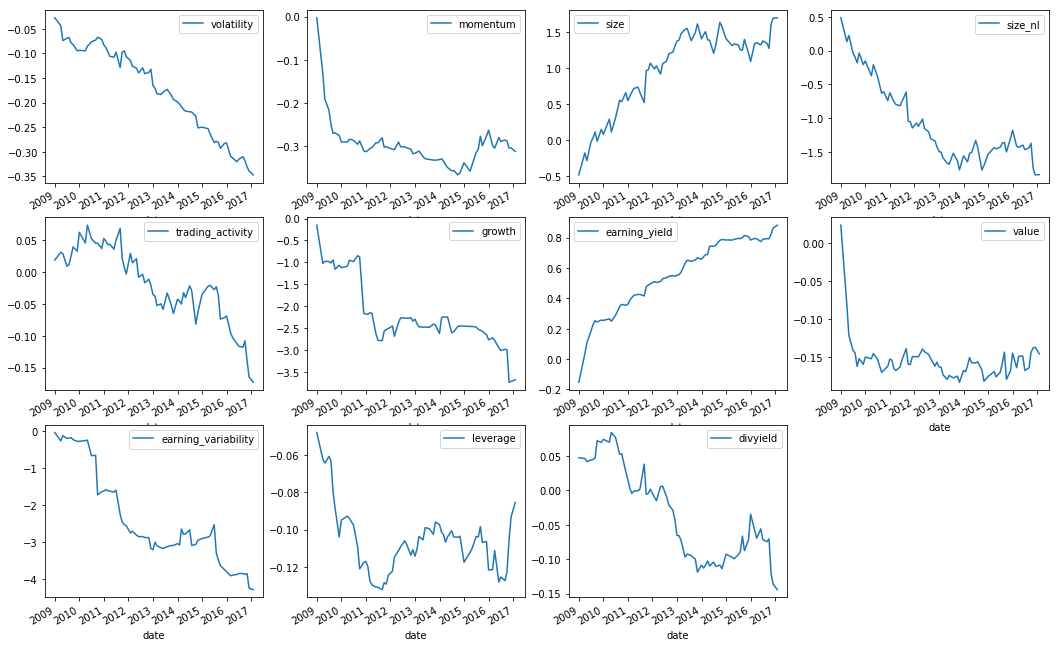

In [32]:
fig = plt.figure(figsize=(18, 12))
i = 0
for factor in factors:
    i = i + 1
    ax = fig.add_subplot(3, 4, i)
    f[factor].dropna().cumsum().plot(ax=ax, legend=True)

## 3. Portfolio Construction  
  
  $$w = \frac{(X \Sigma X^T + e^2)^{-1}(X f - r_f)}{1^T(X \Sigma X^T + e^2)^{-1}(X f - r_f)}$$

In [191]:
w = pd.DataFrame([], index=msf.index.levels[1], columns=msf.index.levels[0])
# sig = f.ewm(halflife=12, min_periods=0).cov()
# err = np.diag(e.ewm(halflife=12, min_periods=0).var())

In [196]:
_X = X.loc[(l, '2009-03-31'), :]

In [207]:
f.ewm(halflife=12, min_periods=0)

EWM [com=16.817153745105777,min_periods=0,adjust=True,ignore_na=False,axis=0]

In [189]:
for date, _X in X.groupby(level=1):
    sig = f.ewm(halflife=12, min_periods=0).cov()
    err = np.diag(e.ewm(halflife=12, min_periods=0).var())

permno,10001,10002,10025,10026,10028,10032,10042,10044,10051,10078,...,93423,93426,93428,93429,93430,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
e.ewm(halflife=12, min_periods=0, axis=0).var()

permno,10001,10002,10025,10026,10028,10032,10042,10044,10051,10078,...,93423,93426,93428,93429,93430,93432,93433,93434,93435,93436
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
